# Text Preprocessing


In [1]:
import nltk
import spacy
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import pandas as pd

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
df = pd.read_csv("Spam_SMS.csv")
df

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


## Case Folding

In [5]:
df.drop("Class", axis=1, inplace=True)

In [6]:
df.head()

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df['lower_case'] = df['Message'].str.lower()
df

,Message,lower_case
0,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...
5570,Will ü b going to esplanade fr home?,will ü b going to esplanade fr home?
5571,"Pity, * was in mood for that. So...any other s...","pity, * was in mood for that. so...any other s..."
5572,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i'd...


## Tokenization

In [8]:
#NLTK
df['tokens_nltk'] = df['lower_case'].apply(lambda x: word_tokenize(x))
print("Text:", df['lower_case'][0])
print("Tokenization (NLTK):", df['tokens_nltk'][0])

Text: go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...
Tokenization (NLTK): ['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amore', 'wat', '...']


In [9]:
#SPACY
#python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

In [10]:
df['tokens_spacy'] = list(nlp.pipe(df['lower_case']))
df['tokens_spacy'] = df['tokens_spacy'].apply(lambda doc: [token.text for token in doc])
print("Text:", df['lower_case'][0])
print("Tokenization (SpaCy):", df['tokens_spacy'][0])

Text: go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...
Tokenization (SpaCy): ['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amore', 'wat', '...']


## Stemming

In [11]:
def stem(tokens_nltk):
    stemmer = PorterStemmer()
    stems = [stemmer.stem(word) for word in tokens_nltk]
    return stems
df['stems_nltk'] = df['tokens_nltk'].apply(lambda x: stem(x))
print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Stemming:", df['stems_nltk'][0])

df['stems_spacy'] = df['tokens_spacy'].apply(lambda x: stem(x))
print("Tokenization (SpaCy):", df['tokens_spacy'][0])
print("Stemming:", df['stems_spacy'][0])

Tokenization (NLTK): ['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amore', 'wat', '...']
Stemming: ['go', 'until', 'jurong', 'point', ',', 'crazi', '..', 'avail', 'onli', 'in', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amor', 'wat', '...']
Tokenization (SpaCy): ['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amore', 'wat', '...']
Stemming: ['go', 'until', 'jurong', 'point', ',', 'crazi', '..', 'avail', 'onli', 'in', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amor', 'wat', '...']


## Lemmatization

In [12]:
def lemma(tokens_nltk):
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(word, pos="v") for word in tokens_nltk]
    return lemmas
df['lemmas_nltk'] = df['tokens_nltk'].apply(lambda x: lemma(x))
print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Lemmatization:", df['lemmas_nltk'][0])

df['lemmas_spacy'] = df['tokens_spacy'].apply(lambda x: lemma(x))
print("Tokenization (SpaCy):", df['tokens_spacy'][0])
print("Lemmatization:", df['lemmas_spacy'][0])

Tokenization (NLTK): ['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amore', 'wat', '...']
Lemmatization: ['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'get', 'amore', 'wat', '...']
Tokenization (SpaCy): ['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amore', 'wat', '...']
Lemmatization: ['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'get', 'amore', 'wat', '...']


## Remove Stopwords

In [13]:
def stop_w(tokens_nltk):
    stop_words = set(stopwords.words("english"))
    tokens_filtered = [word for word in tokens_nltk if word.lower() not in stop_words]
    return tokens_filtered
df['remove_stop_words_nltk'] = df['tokens_nltk'].apply(lambda x: stop_w(x))
print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Stopword Removal:", df['remove_stop_words_nltk'][0])

df['remove_stop_words_spacy'] = df['tokens_spacy'].apply(lambda x: stop_w(x))
print("Tokenization (SpaCy):", df['tokens_spacy'][0])
print("Stopword Removal:", df['remove_stop_words_spacy'][0])

Tokenization (NLTK): ['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amore', 'wat', '...']
Stopword Removal: ['go', 'jurong', 'point', ',', 'crazy', '..', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'got', 'amore', 'wat', '...']
Tokenization (SpaCy): ['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amore', 'wat', '...']
Stopword Removal: ['go', 'jurong', 'point', ',', 'crazy', '..', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'got', 'amore', 'wat', '...']


## Word Cloud

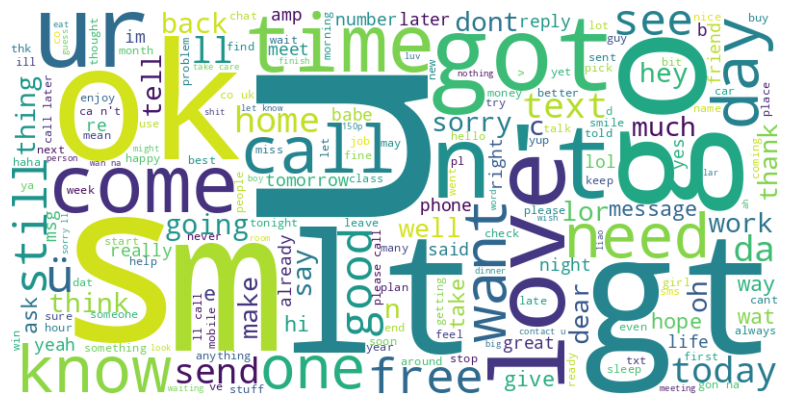

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join([" ".join(words) for words in df['remove_stop_words_nltk']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


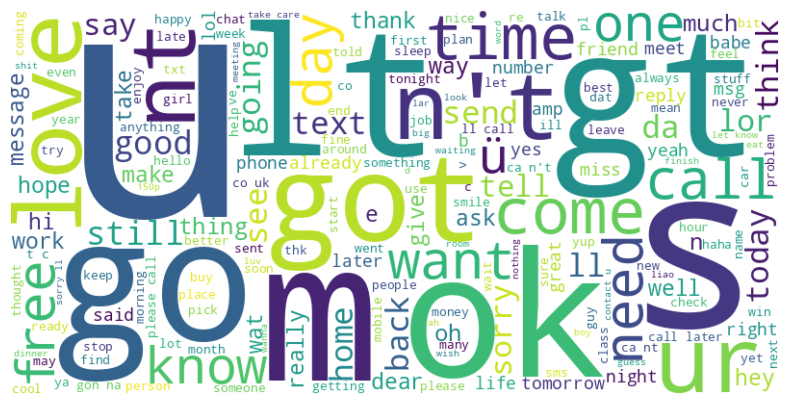

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join([" ".join(words) for words in df['remove_stop_words_spacy']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()